##IRIS FLOWER CLASSIFICATION

The Iris flower dataset comprises three distinct species: Setosa, Versicolor, and Virginica. These species can be differentiated based on their unique measurements, such as sepal and petal length and width. Given a set of Iris flower measurements categorized by their respective species, the objective is to train a machine learning model. This model should effectively learn from the provided data and accurately classify new, unseen Iris flowers into their corresponding species based on their measured characteristics.

#1. Importing the library files

In [ ]:
 import numpy as np
 import pandas as pd
 import matplotlib.pyplot as plt
 import seaborn as sns
 from sklearn.model_selection import train_test_split
 from sklearn import metrics

# 2. Reading the Dataset

In [ ]:
data = pd.read_csv("/content/IRIS.csv")

In [ ]:
data

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,Iris-virginica
146,6.3,2.5,5.0,1.9,Iris-virginica
147,6.5,3.0,5.2,2.0,Iris-virginica
148,6.2,3.4,5.4,2.3,Iris-virginica


#First 5 rows of the dataset

In [ ]:
data.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


#Last 5 rows of the dataset

In [ ]:
data.tail()

,sepal_length,sepal_width,petal_length,petal_width,species
145,6.7,3.0,5.2,2.3,Iris-virginica
146,6.3,2.5,5.0,1.9,Iris-virginica
147,6.5,3.0,5.2,2.0,Iris-virginica
148,6.2,3.4,5.4,2.3,Iris-virginica
149,5.9,3.0,5.1,1.8,Iris-virginica


#Thorough exploration of the dataset
Vewing the Columns in the dataset

In [ ]:
col = data.columns
print(col)

Index(['sepal_length', 'sepal_width', 'petal_length', 'petal_width',
       'species'],
      dtype='object')


#List of categorical features

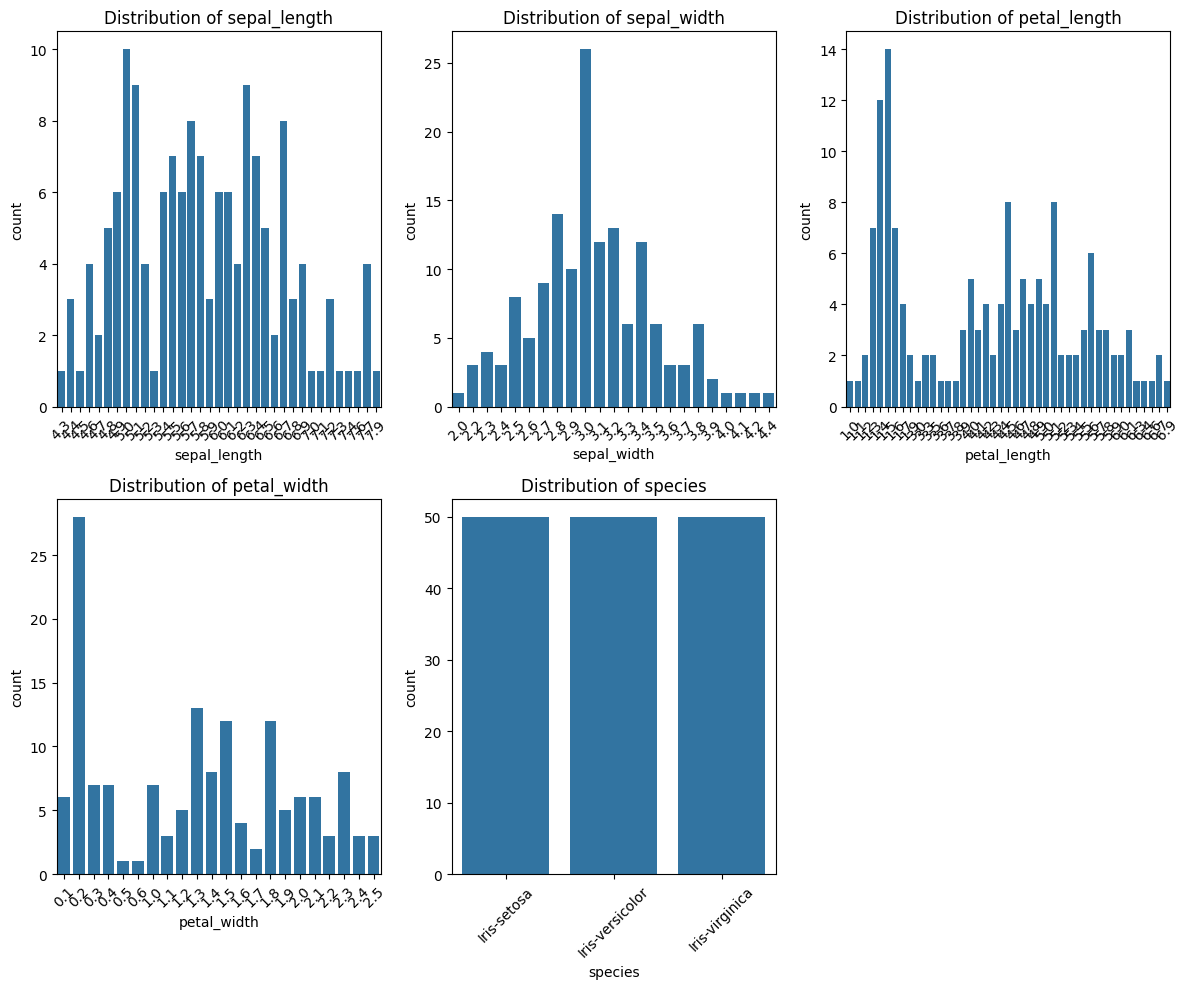

In [ ]:
categorical_features = ['sepal_length', 'sepal_width', 'petal_length', 'petal_width', 'species']

# Set up the matplotlib figure with appropriate rows and columns
plt.figure(figsize=(12, 10))
num_features = len(categorical_features)
rows = (num_features // 3) + (num_features % 3 > 0)  # Adjust rows based on the number of features

# Loop through the features and create a subplot for each
for i, feature in enumerate(categorical_features, 1):
    plt.subplot(rows, 3, i)  # Arrange in a grid of up to 3 columns
    sns.countplot(x=feature, data=data)
    plt.title(f'Distribution of {feature}')
    plt.xticks(rotation=45)

plt.tight_layout()  # Adjust layout for better spacing
plt.show()


Shape of the dataset


In [ ]:
print(data.shape)

(150, 5)


#3. Preprocessing

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal_length  150 non-null    float64
 1   sepal_width   150 non-null    float64
 2   petal_length  150 non-null    float64
 3   petal_width   150 non-null    float64
 4   species       150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


In [ ]:
data.describe()

,sepal_length,sepal_width,petal_length,petal_width
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667
std,0.828066,0.433594,1.764420,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


Checking for missing data before preprocessing


In [ ]:
data.isnull().sum()

,0
sepal_length,0
sepal_width,0
petal_length,0
petal_width,0
species,0


In [ ]:
unique_values = data['species'].unique()

print("Unique values in 'species' column:", unique_values)


Unique values in 'species' column: ['Iris-setosa' 'Iris-versicolor' 'Iris-virginica']


In [ ]:
 from sklearn import preprocessing
 le = preprocessing.LabelEncoder()
 le.fit(data.species)
 data['species'] = le.transform(data.species)

#Heatmap for Correlation:

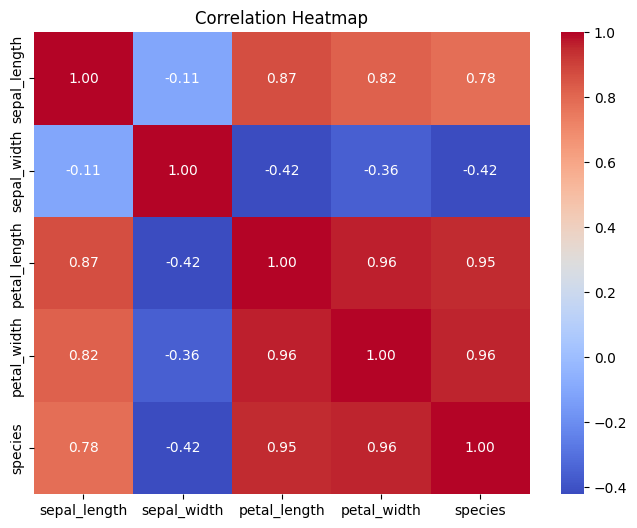

In [ ]:
plt.figure(figsize=(8,6))
corr_matrix = data.corr()
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Heatmap')
plt.show()

#Finding the Correlation between each feature

In [ ]:
corr = data.corr()
corr

,sepal_length,sepal_width,petal_length,petal_width,species
sepal_length,1.000000,-0.109369,0.871754,0.817954,0.782561
sepal_width,-0.109369,1.000000,-0.420516,-0.356544,-0.419446
petal_length,0.871754,-0.420516,1.000000,0.962757,0.949043
petal_width,0.817954,-0.356544,0.962757,1.000000,0.956464
species,0.782561,-0.419446,0.949043,0.956464,1.000000


# Plot the distribution of the target variable

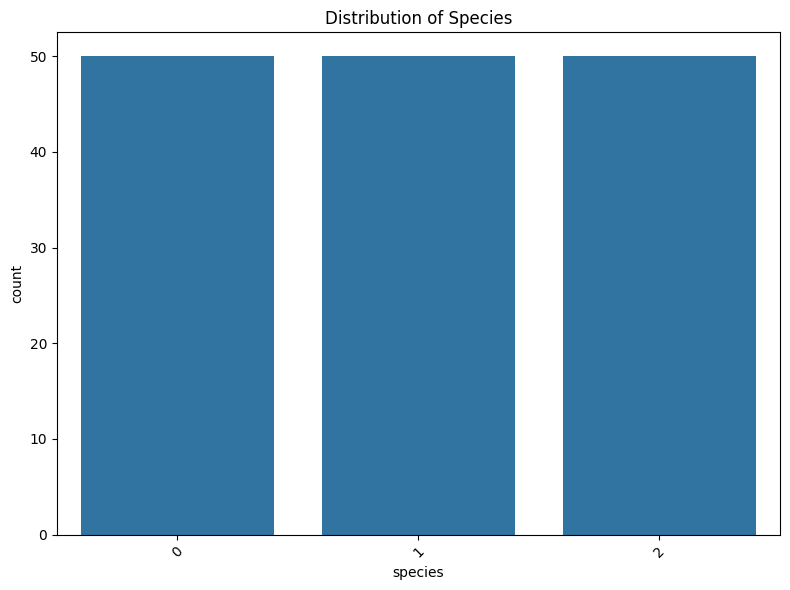

In [ ]:
plt.figure(figsize=(8, 6))
sns.countplot(x='species', data=data)
plt.title('Distribution of Species')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

#4. Splitting the data

In [ ]:
X = data.drop(columns=['species'])
y = data['species']


# Print the shapes of X and y to confirm the split

In [ ]:
print(f"X shape: {X.shape}")
print(f"y shape: {y.shape}")

X shape: (150, 4)
y shape: (150,)


In [ ]:
X

,sepal_length,sepal_width,petal_length,petal_width
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2
...,...,...,...,...
145,6.7,3.0,5.2,2.3
146,6.3,2.5,5.0,1.9
147,6.5,3.0,5.2,2.0
148,6.2,3.4,5.4,2.3


In [ ]:
y

,species
0,0
1,0
2,0
3,0
4,0
...,...
145,2
146,2
147,2
148,2


#Splitting into Training and Testing sets and balance the class labels

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
# Display the shapes of the resulting datasets
print(f"Training features shape: {X_train.shape}")
print(f"Testing features shape: {X_test.shape}")
print(f"Training labels shape: {y_train.shape}")
print(f"Testing labels shape: {y_test.shape}")

Training features shape: (120, 4)
Testing features shape: (30, 4)
Training labels shape: (120,)
Testing labels shape: (30,)


5. Building The Models

#A. Implimentation of Logistic Regression and analysing the perfomance

In [ ]:
from sklearn.linear_model import LogisticRegression

# Initialize the Logistic Regression model with specified hyperparameters
log_reg_model = LogisticRegression(
    C=1,  # Regularization strength
    penalty='l2',  # Regularization type, 'l2' is the most common
    solver='lbfgs',  # Optimization algorithm (good for larger datasets)
    max_iter=1000,  # Maximum number of iterations for optimization
    random_state=42,  # For reproducibility
    l1_ratio=None,  # Only used if 'elasticnet' penalty is chosen
)

# Train the model on the training data (X_train, y_train)
log_reg_model.fit(X_train, y_train)

# Make predictions with the trained model
y_pred = log_reg_model.predict(X_test)

In [ ]:
 cnf_matrix = metrics.confusion_matrix(y_test, y_pred)
 cnf_matrix

array([[10,  0,  0],
       [ 0,  9,  0],
       [ 0,  0, 11]])

In [ ]:
 from sklearn.metrics import classification_report
 print("\nClassification Report of Logistic Regression:\n",metrics.classification_report(y_test, y_pred))
 print ("---------------------------------------------------------------------")


Classification Report of Logistic Regression:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00        10
           1       1.00      1.00      1.00         9
           2       1.00      1.00      1.00        11

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30

---------------------------------------------------------------------


In [ ]:

print('Accuracy of the classifer is %0.2f' % metrics.accuracy_score(y_test,y_pred))
print ("-------------------------------------------------------------------")

Accuracy of the classifer is 1.00
-------------------------------------------------------------------


#B. Implementation of SVM and analysing the perfomance

In [ ]:
 from sklearn.svm import SVC
 # Building a Support Vector Machine on train data
 svc_model = SVC(kernel='linear',random_state=1234, gamma= 'scale')
 svc_model.fit(X_train, y_train)

SVC(kernel='linear', random_state=1234)

In [ ]:
y_pred = svc_model.predict(X_test)

In [ ]:
 cnf_matrix = metrics.confusion_matrix(y_test, y_pred)
 cnf_matrix

array([[10,  0,  0],
       [ 0,  9,  0],
       [ 0,  0, 11]])

In [ ]:
print("\nClassification Report:\n",metrics.classification_report(y_test, y_pred))
print ("---------------------------------------------------------------------")


Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00        10
           1       1.00      1.00      1.00         9
           2       1.00      1.00      1.00        11

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30

---------------------------------------------------------------------


In [ ]:
print('Accuracy of the classifer is %0.2f' % metrics.accuracy_score(y_test,y_pred))
print ("-------------------------------------------------------------------")

Accuracy of the classifer is 1.00
-------------------------------------------------------------------


#C. Implimenting KNN Classifier and analysing the perfomance

In [ ]:
 from sklearn.neighbors import KNeighborsClassifier
 knn = KNeighborsClassifier(n_neighbors=5)
 classifier = knn.fit(X_train,y_train)
 y_pred = classifier.predict(X_test)

In [ ]:
confusion = metrics.confusion_matrix(y_true = y_test,y_pred = y_pred)
confusion

array([[10,  0,  0],
       [ 0,  9,  0],
       [ 0,  0, 11]])

In [ ]:
print("\nClassification Report:\n",metrics.classification_report(y_test, y_pred))
print ("---------------------------------------------------------------------")


Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00        10
           1       1.00      1.00      1.00         9
           2       1.00      1.00      1.00        11

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30

---------------------------------------------------------------------


In [ ]:
print('Accuracy of the classifer is %0.2f' % metrics.accuracy_score(y_test,y_pred))
print ("-------------------------------------------------------------------")

Accuracy of the classifer is 1.00
-------------------------------------------------------------------


#D. Implimentation of Decision Tree Classifier and analysing the perfomance

In [ ]:
dtc = DecisionTreeClassifier(criterion='entropy', min_samples_leaf=4,
                       random_state=1234)

# Fit the model to the training data
dtc.fit(X_train, y_train)

# Predict on the test data
y_pred = dtc.predict(X_test)

In [ ]:
 # import the metrics class
 from sklearn import metrics
 cnf_matrix = metrics.confusion_matrix(y_test, y_pred)
 cnf_matrix

array([[10,  0,  0],
       [ 0,  9,  0],
       [ 0,  0, 11]])

In [ ]:
print("\nClassification Report:\n",metrics.classification_report(y_test, y_pred))
print ("---------------------------------------------------------------------")


Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00        10
           1       1.00      1.00      1.00         9
           2       1.00      1.00      1.00        11

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30

---------------------------------------------------------------------


In [ ]:
print('Accuracy of the classifer is %0.2f' % metrics.accuracy_score(y_test,y_pred))
print ("-------------------------------------------------------------------")

Accuracy of the classifer is 1.00
-------------------------------------------------------------------


##Visualize the model
Visualize the Decision Tree on Training Data

In [ ]:
from sklearn import tree
text_representation = tree.export_text(dtc)
print(text_representation)

|--- feature_2 <= 2.45
|   |--- class: 0
|--- feature_2 >  2.45
|   |--- feature_2 <= 4.75
|   |   |--- feature_0 <= 5.05
|   |   |   |--- class: 1
|   |   |--- feature_0 >  5.05
|   |   |   |--- class: 1
|   |--- feature_2 >  4.75
|   |   |--- feature_3 <= 1.75
|   |   |   |--- feature_2 <= 5.05
|   |   |   |   |--- class: 1
|   |   |   |--- feature_2 >  5.05
|   |   |   |   |--- class: 2
|   |   |--- feature_3 >  1.75
|   |   |   |--- feature_2 <= 4.95
|   |   |   |   |--- class: 2
|   |   |   |--- feature_2 >  4.95
|   |   |   |   |--- class: 2



In [ ]:
with open("decistion_tree_train.log", "w") as fout:
 fout.write(text_representation)

# Specify feature names as a list

In [ ]:
print(np.unique(y_train))

[0 1 2]


In [ ]:
feature_names = ['sepal_length', 'sepal_width', 'petal_length', 'petal_width',
       'species']

class_names = ['0', '1', '2']

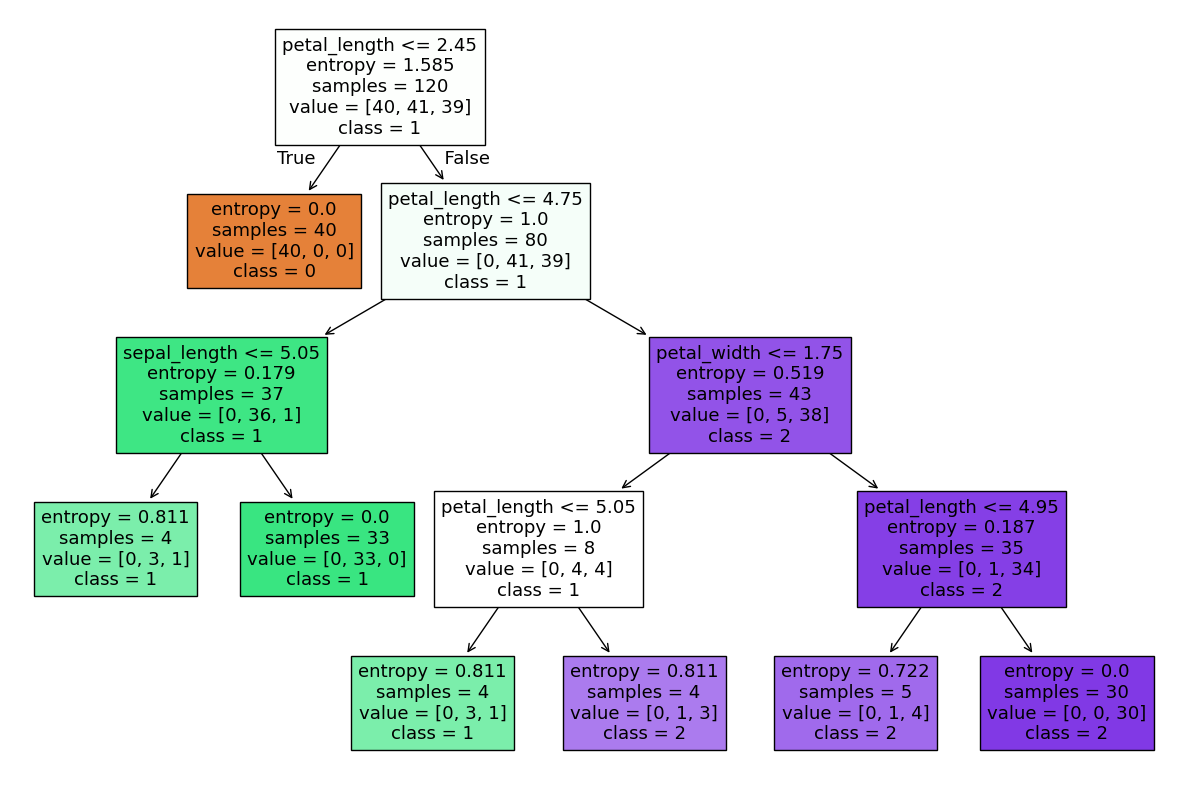

In [ ]:
# Plot the tree
fig = plt.figure(figsize=(15,10))
tree.plot_tree(dtc, feature_names=feature_names, class_names=class_names, filled=True)
fig.savefig('decision_tree.png')
plt.show()

In [ ]:
fig.savefig("decistion_tree_train.png")

#Visualize the Decision Tree on Testing Data

In [ ]:
clf_test = DecisionTreeClassifier(random_state=1234)
dt_test = clf_test.fit(X_test, y_test)
text_representation = tree.export_text(clf_test)
print(text_representation)

|--- feature_2 <= 4.85
|   |--- feature_3 <= 0.75
|   |   |--- class: 0
|   |--- feature_3 >  0.75
|   |   |--- class: 1
|--- feature_2 >  4.85
|   |--- class: 2



In [ ]:
with open("decistion_tree_test.log", "w") as fout:
 fout.write(text_representation)

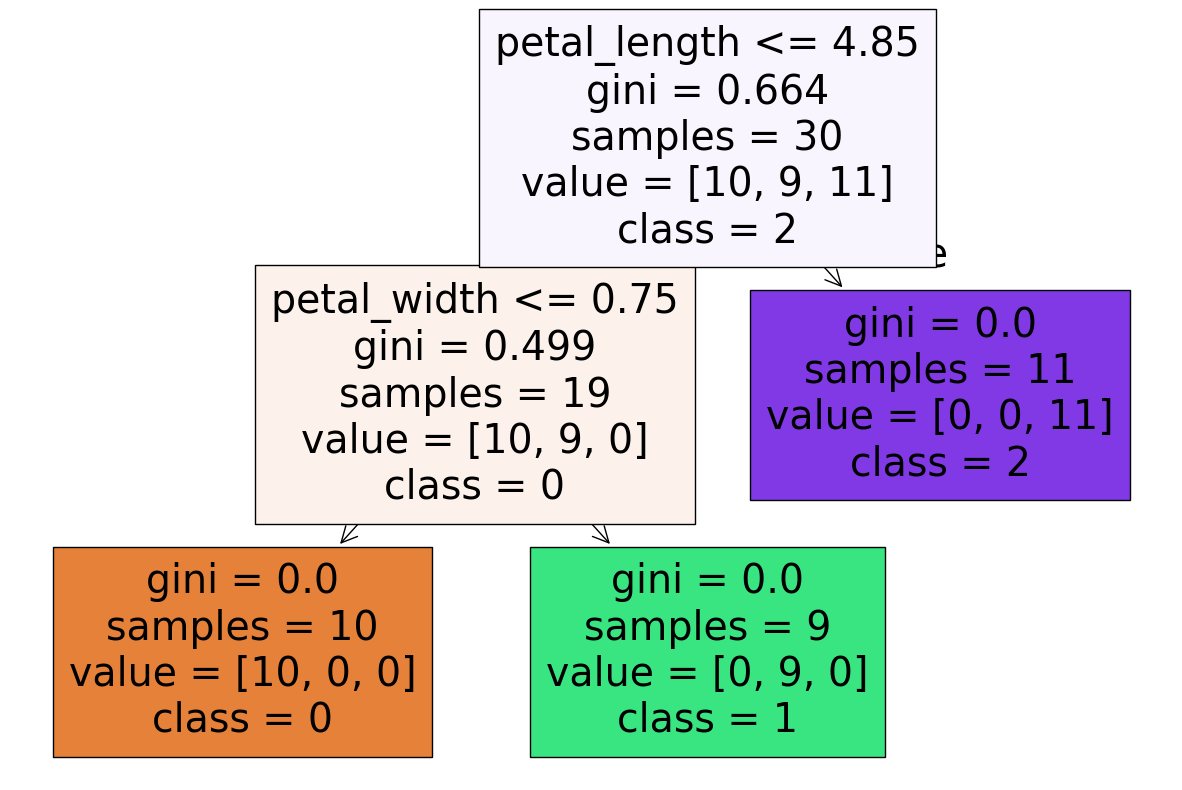

In [ ]:
fig = plt.figure(figsize=(15,10))
tree.plot_tree(clf_test, feature_names=feature_names, class_names=class_names,filled=True,max_depth = 2)
fig.savefig('imagename1.png')

fig.savefig("decistion_tree_test.png")

#Visualize the Decision Tree on overall Data

In [ ]:
clf = DecisionTreeClassifier(random_state=1234)
dt = clf.fit(X, y)
text_representation = tree.export_text(clf)
print(text_representation)

|--- feature_2 <= 2.45
|   |--- class: 0
|--- feature_2 >  2.45
|   |--- feature_3 <= 1.75
|   |   |--- feature_2 <= 4.95
|   |   |   |--- feature_3 <= 1.65
|   |   |   |   |--- class: 1
|   |   |   |--- feature_3 >  1.65
|   |   |   |   |--- class: 2
|   |   |--- feature_2 >  4.95
|   |   |   |--- feature_3 <= 1.55
|   |   |   |   |--- class: 2
|   |   |   |--- feature_3 >  1.55
|   |   |   |   |--- feature_0 <= 6.95
|   |   |   |   |   |--- class: 1
|   |   |   |   |--- feature_0 >  6.95
|   |   |   |   |   |--- class: 2
|   |--- feature_3 >  1.75
|   |   |--- feature_2 <= 4.85
|   |   |   |--- feature_1 <= 3.10
|   |   |   |   |--- class: 2
|   |   |   |--- feature_1 >  3.10
|   |   |   |   |--- class: 1
|   |   |--- feature_2 >  4.85
|   |   |   |--- class: 2



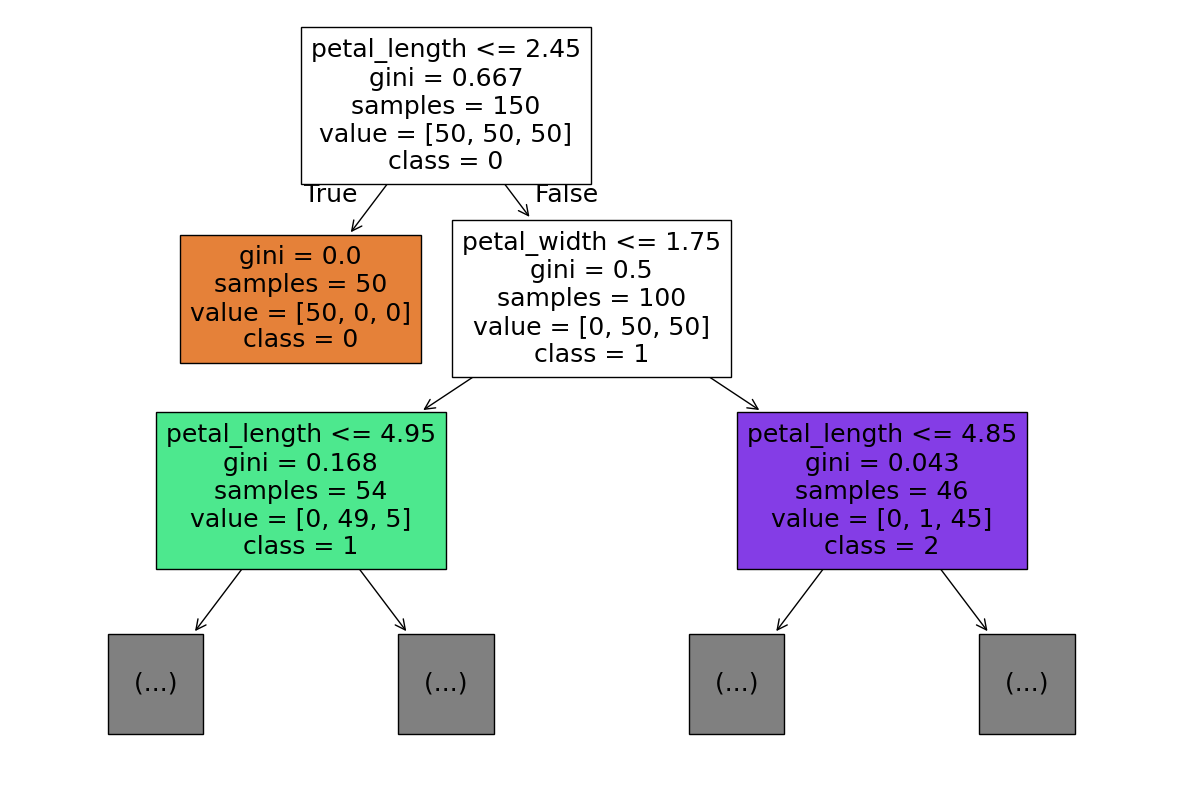

In [ ]:
# Write the textual representation of the tree to a log file
with open("decision_tree.log", "w") as fout:
    fout.write(text_representation)

# Plot the decision tree
fig = plt.figure(figsize=(15, 10))
tree.plot_tree(clf, feature_names=feature_names, class_names=class_names, filled=True, max_depth=2)

# Save the image of the decision tree
fig.savefig('decision_tree_image.png')

# Show the plot
plt.show()

##------------------------------------------------------------------  THE END   ---------------------------------------------------------------------